## Load dataset

(70000, 28, 28)
(70000,)
0


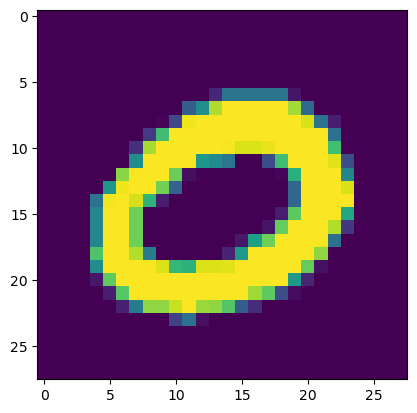

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import struct 

def read_images(filepath):
    with open(filepath, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, 28, 28)
    return images

def read_labels(filepath):
    with open(filepath, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

imgs_60k = read_images("./Datasets/train-images.idx3-ubyte")
imgs_10k = read_images("./Datasets/t10k-images.idx3-ubyte")

labels_60k = read_labels("./Datasets/train-labels.idx1-ubyte")
labels_10k = read_labels("./Datasets/t10k-labels.idx1-ubyte")

imgs = np.vstack([imgs_60k, imgs_10k])
labels = np.hstack([labels_60k, labels_10k])

print(imgs.shape)
print(labels.shape)

print(labels[6001])
plt.imshow(imgs[6001])

In [2]:
from sklearn.model_selection import train_test_split

# train, test, valid
SPLITS = {
    "train": 0.7,
    "val": 0.2,
    "test": 0.1,
}

train_test_imgs, val_imgs, train_test_labels, val_labels = train_test_split(imgs, labels, test_size=SPLITS["val"])
train_imgs, test_imgs, train_labels, test_labels = train_test_split(train_test_imgs, train_test_labels, test_size=SPLITS["test"] / (SPLITS["train"] + SPLITS["test"]))

## Fit into KNN

K = 1 -- Erro = 0.05714285714285716
K = 2 -- Erro = 0.0645
K = 3 -- Erro = 0.05728571428571427
K = 4 -- Erro = 0.05900000000000005
K = 5 -- Erro = 0.05771428571428572
K = 6 -- Erro = 0.059285714285714275
K = 7 -- Erro = 0.059428571428571386
K = 8 -- Erro = 0.0615
K = 9 -- Erro = 0.06235714285714289


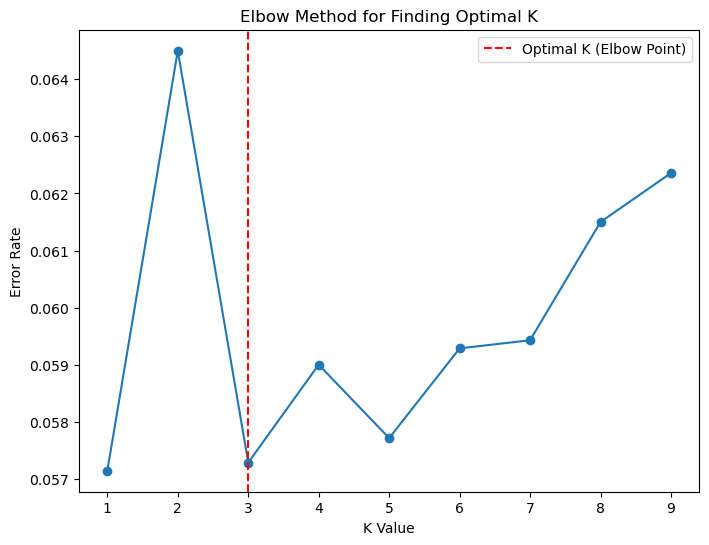

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_imgs.reshape((-1, 28*28)))
val_images_scaled = scaler.transform(val_imgs.reshape((-1, 28*28)))

# find the best K value

errors = []
for k in range(1, 10):
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(train_images_scaled, train_labels)
    pred_labels = knn_scaled.predict(val_images_scaled)
    error_score = 1 - accuracy_score(val_labels, pred_labels)
    errors.append(error_score)
    print(f"K = {k} -- Erro = {error_score}")


plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), errors, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.axvline(x=3, linestyle='--', color='red', label="Optimal K (Elbow Point)")
plt.legend()
plt.show()

In [5]:
best_k = 3

errors = []
for metric in ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'nan_euclidean']:
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn.fit(train_images_scaled, train_labels)
    pred_labels = knn.predict(val_images_scaled)
    error_score = 1 - accuracy_score(val_labels, pred_labels)
    errors.append(error_score)
    print(f"{metric} -- Erro = {error_score}")


plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), errors, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.axvline(x=3, linestyle='--', color='red', label="Optimal K (Elbow Point)")
plt.legend()
plt.show()